Zero Coupon Bond Price: 0.997968


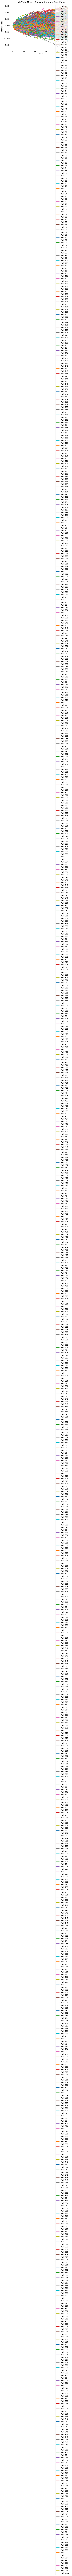

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import quantlib as ql

import numpy as np

def hull_white_mc(n_paths, n_steps, T, alpha, sigma):
    dt = T / n_steps

    # Generate random numbers for Monte Carlo simulation
    np.random.seed(42)
    dW = np.random.normal(size=(n_paths, n_steps)) * np.sqrt(dt)

    # Initialize interest rate paths
    r_paths = np.zeros((n_paths, n_steps + 1))

    for i in range(1, n_steps + 1):
        t = i * dt

        # Hull-White model dynamics
        drift = alpha * (0.05 - r_paths[:, i - 1]) * dt
        diffusion = sigma * dW[:, i - 1]

        # Update interest rate paths
        r_paths[:, i] = r_paths[:, i - 1] + drift + diffusion

    return r_paths

def zero_coupon_bond_price(r_paths, T):
    dt = T / r_paths.shape[1]
    discount_factors = np.exp(-np.sum(r_paths[:, 1:], axis=1) * dt)
    return np.mean(discount_factors)

# Parameters
n_paths = 1000  # Number of Monte Carlo paths
n_steps = 252   # Number of time steps
T = 1           # Time to maturity
alpha = 0.1     # Mean reversion speed
sigma = 0.02    # Volatility

# Monte Carlo simulation
r_paths = hull_white_mc(n_paths, n_steps, T, alpha, sigma)

# Zero coupon bond pricing
zero_coupon_bond_price = zero_coupon_bond_price(r_paths, T)

print(f"Zero Coupon Bond Price: {zero_coupon_bond_price:.6f}")

# Plotting interest rate paths vs time
time_steps = np.linspace(0, T, n_steps + 1)
for i in range(n_paths):
    plt.plot(time_steps, r_paths[i, :], label=f'Path {i + 1}')

plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Hull-White Model: Simulated Interest Rate Paths')
plt.legend()
plt.show()


# read matrix fro

